In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


In [85]:
file_path = "/Users/luisrodriguez/Desktop/PROYECTOS/project1/spotify-2023.csv"

spotify_data = pd.read_csv(file_path, encoding='latin-1')
#filtra la información por streams y limpia el dato erroneo del csv
spotify_df = pd.DataFrame(spotify_data).sort_values(by='streams', ascending=False).reset_index().drop(0).reset_index()
spotify_df['streams']= spotify_df['streams'].astype('int64')
#spotify_df['in_deezer_playlists']= spotify_df['in_deezer_playlists'].astype('int64')
#spotify_df['in_shazam_charts']= spotify_df['in_shazam_charts'].astype('int64')
#spotify_df['key']= spotify_df['key'].astype('int64')
#spotify_df['mode']= spotify_df['mode'].astype('int64')
spotify_df['streams in millions'] = (spotify_df['streams'] / 1000000).round(2)
spotify_df




,level_0,index,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,streams in millions
0,1,33,Anti-Hero,Taylor Swift,1,2022,10,21,9082,56,...,E,Major,64,51,63,12,0,19,5,999.75
1,2,625,Arcade,Duncan Laurence,1,2019,3,7,6646,0,...,A,Minor,45,27,33,82,0,14,4,991.34
2,3,253,Glimpse of Us,Joji,1,2022,6,10,6330,6,...,G#,Major,44,27,32,89,0,14,5,988.52
3,4,455,Seek & Destroy,SZA,1,2022,12,9,1007,0,...,C#,Major,65,35,65,44,18,21,7,98.71
4,5,98,Summertime Sadness,Lana Del Rey,1,2011,1,1,20333,52,...,C#,Minor,56,24,66,7,0,12,3,983.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,948,366,Revenge,XXXTENTACION,1,2017,8,25,3600,11,...,B,Minor,75,18,25,78,0,11,26,1022.26
948,949,744,Right On,Lil Baby,1,2022,4,8,1116,0,...,D,Major,70,22,61,2,0,10,34,101.78
949,950,515,Best Friends,The Weeknd,1,2022,1,7,1292,0,...,E,Minor,49,49,59,44,0,35,21,101.11
950,951,500,ýýýabcdefu,Gayle,1,2021,8,13,7215,0,...,E,Major,70,42,54,30,0,37,5,1007.61


In [89]:
#top 10 artistas x streams

topartists_streams = spotify_df.groupby(['artist(s)_name'])['streams in millions'].sum().sort_values(ascending =False).to_frame().head(10).reset_index()
topartists_streams

,artist(s)_name,streams in millions
0,The Weeknd,14185.54
1,Taylor Swift,14053.65
2,Ed Sheeran,13908.94
3,Harry Styles,11608.63
4,Bad Bunny,9997.79
5,Olivia Rodrigo,7442.15
6,Eminem,6183.80
7,Bruno Mars,5846.93
8,Arctic Monkeys,5569.81
9,Imagine Dragons,5272.48


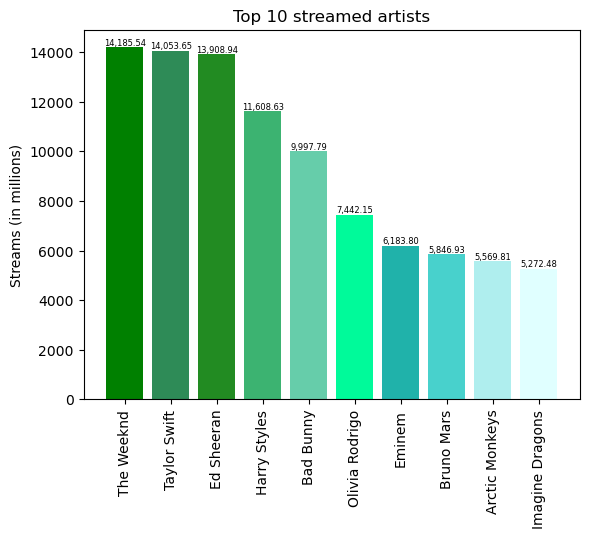

In [93]:
#plot artistas por streams

colors = ['green','seagreen','forestgreen','mediumseagreen','mediumaquamarine','mediumspringgreen','lightseagreen','mediumturquoise','paleturquoise','lightcyan']
plt.bar(topartists_streams['artist(s)_name'],topartists_streams['streams in millions'],color=colors)
plt.title('Top 10 streamed artists')
plt.xlabel('')
plt.ylabel('Streams (in millions)')
plt.xticks(rotation=90)

for i, count in enumerate(topartists_streams['streams in millions']):
    plt.text(i, count + 0.5, '{:,.2f}'.format(count), ha='center', va='bottom', fontsize=6)
plt.show()

In [96]:
#limpiar base de datos solo con estos artistas
topartists_df = pd.merge(spotify_df,topartists_streams['artist(s)_name'],on='artist(s)_name',how='inner')
topartists_df

,level_0,index,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,streams in millions
0,1,33,Anti-Hero,Taylor Swift,1,2022,10,21,9082,56,...,E,Major,64,51,63,12,0,19,5,999.75
1,49,100,Lover,Taylor Swift,1,2012,1,1,8448,23,...,G,Major,43,50,55,50,0,15,10,882.83
2,77,59,cardigan,Taylor Swift,1,2020,7,24,7923,29,...,NaN,Minor,61,53,58,55,0,27,4,812.02
3,84,3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,...,A,Major,55,58,72,11,0,11,15,800.84
4,89,38,Style,Taylor Swift,1,2014,1,1,7830,42,...,D,Major,60,48,79,0,0,12,4,786.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,872,134,505,Arctic Monkeys,1,2007,4,20,13985,25,...,NaN,Major,52,20,85,0,0,7,5,1217.12
119,719,169,When I Was Your Man,Bruno Mars,1,2012,12,5,2420,11,...,NaN,Major,60,43,27,94,0,14,4,1661.19
120,725,188,Just The Way You Are,Bruno Mars,1,2010,1,1,21106,13,...,F,Major,63,46,85,1,0,9,5,1641.43
121,768,154,Locked Out Of Heaven,Bruno Mars,1,2012,12,5,1622,9,...,F,Major,73,87,70,6,0,28,5,1481.35


In [94]:
artist_counts = topartists_df['artist(s)_name'].value_counts().reset_index()
artists_df = pd.DataFrame(artist_counts).head(10)
artists_df

,artist(s)_name,count
0,Taylor Swift,34
1,The Weeknd,22
2,Bad Bunny,19
3,Harry Styles,17
4,Ed Sheeran,9
5,Olivia Rodrigo,7
6,Eminem,4
7,Arctic Monkeys,4
8,Bruno Mars,4
9,Imagine Dragons,3


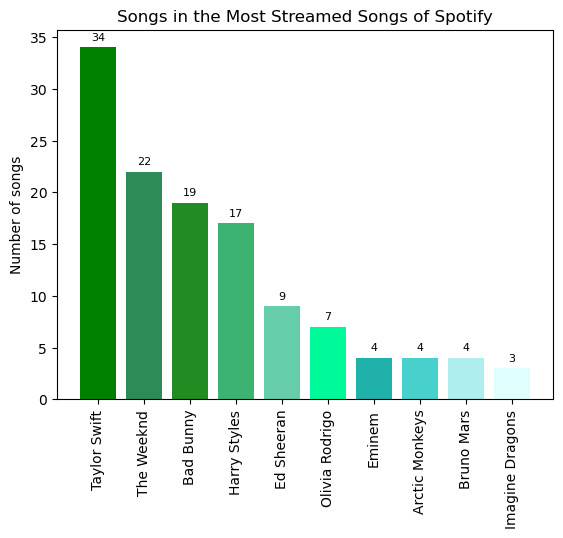

In [97]:

colors = ['green','seagreen','forestgreen','mediumseagreen','mediumaquamarine','mediumspringgreen','lightseagreen','mediumturquoise','paleturquoise','lightcyan']
plt.bar(artists_df['artist(s)_name'],artists_df['count'],color=colors)
plt.title('Songs in the Most Streamed Songs of Spotify')
plt.xlabel('')
plt.ylabel('Number of songs')
plt.xticks(rotation=90)

for i, count in enumerate(artists_df['count']):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=8)
plt.show()

In [112]:
# percentage_bins = [0, 25, 50, 75, 100]
# labels = ['0-25%','25-50%','50-75%','75-100%']

# composicion = topartists_df[['artist(s)_name','track_name','streams in millions','danceability_%']]

# composicion.loc[:, 'danceability'] = pd.cut(composicion['danceability_%'],
#                                              bins=percentage_bins, labels=labels,
#                                              include_lowest=True)

# composicion

/var/folders/53/y7vhv91s5wjg128t3djpb4t80000gn/T/ipykernel_98663/617646107.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  composicion.loc[:, 'danceability'] = pd.cut(composicion['danceability_%'],


,artist(s)_name,track_name,streams in millions,danceability_%,danceability
0,Taylor Swift,Anti-Hero,999.75,64,50-75%
1,Taylor Swift,Lover,882.83,43,25-50%
2,Taylor Swift,cardigan,812.02,61,50-75%
3,Taylor Swift,Cruel Summer,800.84,55,50-75%
4,Taylor Swift,Style,786.18,60,50-75%
...,...,...,...,...,...
118,Arctic Monkeys,505,1217.12,52,50-75%
119,Bruno Mars,When I Was Your Man,1661.19,60,50-75%
120,Bruno Mars,Just The Way You Are,1641.43,63,50-75%
121,Bruno Mars,Locked Out Of Heaven,1481.35,73,50-75%


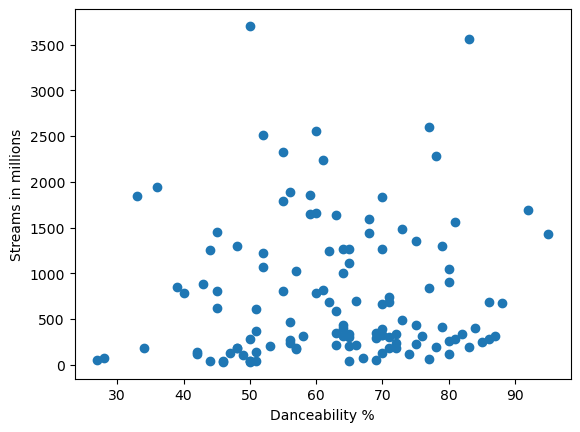

0.10594617325499751

In [119]:

#correlación danceability% 

plt.scatter(topartists_df['danceability_%'],topartists_df['streams in millions'])
plt.xlabel('Danceability %')
plt.ylabel('Streams in millions')
plt.show()

dance_corr = topartists_df['danceability_%'].corr(topartists_df['streams in millions'], method='spearman')
dance_corr

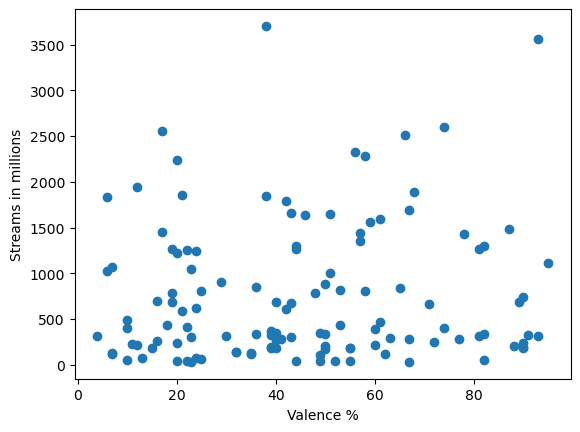

0.07542612169510395

In [121]:
plt.scatter(topartists_df['valence_%'],topartists_df['streams in millions'])
plt.xlabel('Valence %')
plt.ylabel('Streams in millions')
plt.show()


valence_corr = topartists_df['valence_%'].corr(topartists_df['streams in millions'], method='spearman')
valence_corr

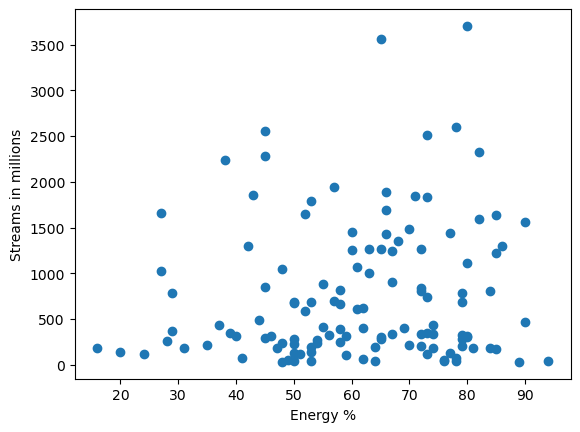

0.07697791539197997

In [123]:
plt.scatter(topartists_df['energy_%'],topartists_df['streams in millions'])
plt.xlabel('Energy %')
plt.ylabel('Streams in millions')
plt.show()

energy_corr = topartists_df['energy_%'].corr(topartists_df['streams in millions'], method='spearman')
energy_corr

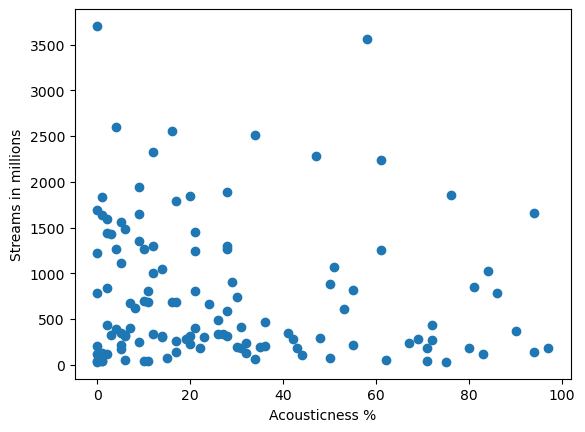

-0.103000174435927

In [124]:
plt.scatter(topartists_df['acousticness_%'],topartists_df['streams in millions'])
plt.xlabel('Acousticness %')
plt.ylabel('Streams in millions')
plt.show()

energy_corr = topartists_df['acousticness_%'].corr(topartists_df['streams in millions'], method='spearman')
energy_corr

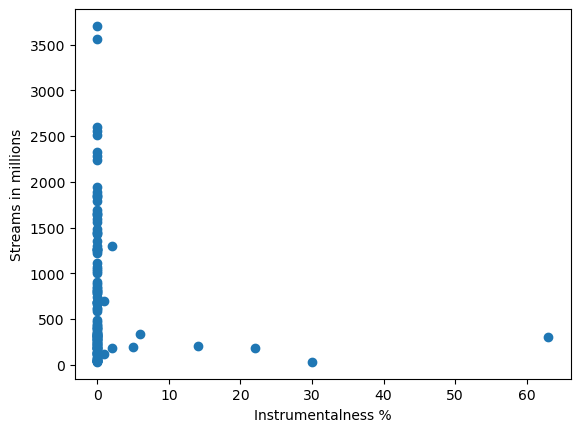

-0.18460549573338958

In [125]:
plt.scatter(topartists_df['instrumentalness_%'],topartists_df['streams in millions'])
plt.xlabel('Instrumentalness %')
plt.ylabel('Streams in millions')
plt.show()

energy_corr = topartists_df['instrumentalness_%'].corr(topartists_df['streams in millions'], method='spearman')
energy_corr